## Bivariate - Exploratory data analysis (EDA) - Manual

### By:
Jose R. Zapata

### Date:
2024-10-24

### Description:

Bivariate Exploratory data analysis (EDA) and description of the data set.

Data manipulation and visualization


## 📚 Import  libraries

In [1]:
# base libraries for data science
import sys
import warnings
from pathlib import Path

import pandas as pd
import seaborn as sns

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# configuration to show only 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.11.11 (main, Dec  6 2024, 20:02:44) [Clang 18.1.8 ]
Pandas version:  2.2.3


## 💾 Load data

The dataset has correct data types, fixed in:

`notebooks/2-exploration/01-jrz-data_explore_description-2024_03_01.ipynb`

In [4]:
DATA_DIR = Path.cwd().resolve().parents[1] / "data"

titanic_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/titanic_type_fixed.parquet", engine="pyarrow"
)

## 📊 Data description

### General data information

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  1309 non-null   int64   
 1   pclass      1309 non-null   int64   
 2   survived    1309 non-null   bool    
 3   name        1309 non-null   object  
 4   sex         1309 non-null   category
 5   age         1046 non-null   float64 
 6   sibsp       1309 non-null   int64   
 7   parch       1309 non-null   int64   
 8   fare        1308 non-null   float64 
 9   embarked    1307 non-null   category
dtypes: bool(1), category(2), float64(2), int64(4), object(1)
memory usage: 75.8+ KB


Ordinal data has to be converted again

information about the pclass column can be chech in the notebook

`notebooks/2-exploration/01-jrz-data_explore_description-2024_03_01.ipynb`

In [6]:
titanic_df["pclass"] = pd.Categorical(titanic_df["pclass"], categories=[3, 2, 1], ordered=True)

# column Unnamed: 0 is not needed
titanic_df = titanic_df.drop(columns=["Unnamed: 0"])

General information about the data set:

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   survived  1309 non-null   bool    
 2   name      1309 non-null   object  
 3   sex       1309 non-null   category
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   fare      1308 non-null   float64 
 8   embarked  1307 non-null   category
dtypes: bool(1), category(3), float64(2), int64(2), object(1)
memory usage: 56.8+ KB


In [8]:
# size of the dataframe
titanic_df.shape

(1309, 9)

In [9]:
# sample of the dataframe
titanic_df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
1033,3,True,"Moss, Mr. Albert Johan",male,NaN,0,0,7.78,S
222,1,False,"Ovies y Rodriguez, Mr. Servando",male,28.50,0,0,27.72,C
1070,3,False,"O'Brien, Mr. Timothy",male,NaN,0,0,7.83,Q
952,3,False,"Larsson-Rondberg, Mr. Edvard A",male,22.00,0,0,7.78,S
706,3,False,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,14.46,C


Number of missing values

In [10]:
titanic_df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

Target Variable = `Survived`

#### General statistics of the data set

##### Numerical variables

In [11]:
titanic_df.describe()

,age,sibsp,parch,fare
count,1046.00,1309.00,1309.00,1308.00
mean,29.88,0.50,0.39,33.30
std,14.41,1.04,0.87,51.76
min,0.17,0.00,0.00,0.00
25%,21.00,0.00,0.00,7.90
50%,28.00,0.00,0.00,14.45
75%,39.00,1.00,0.00,31.27
max,80.00,8.00,9.00,512.33


##### Categorical variables

In [12]:
# categorical columns description
titanic_df.describe(include="category")

,pclass,sex,embarked
count,1309,1309,1307
unique,3,2,3
top,3,male,S
freq,709,843,914


### 📈  Bivariate Analysis

Is important to check the relationship between the target variable and the other variables.

The target variable is `Survived`


#### Target vs Numerical Variables

##### survived vs age

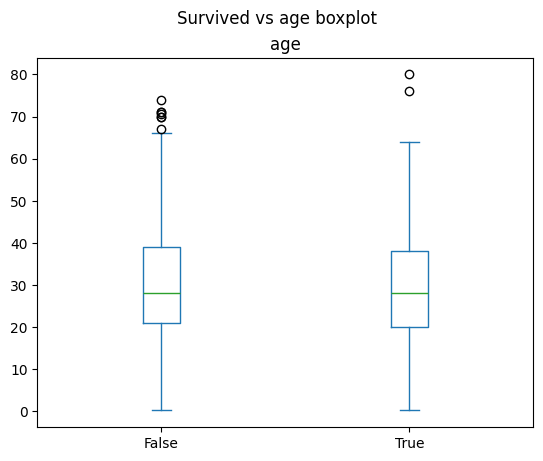

In [13]:
variable = "age"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

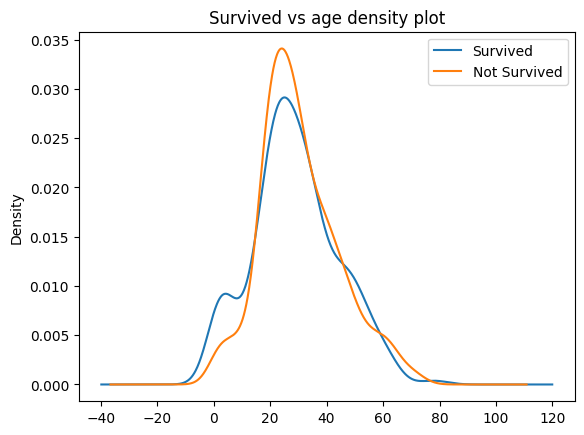

In [14]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="kde",
    label="Survived",
    legend=True,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="kde",
    label="Not Survived",
    legend=True,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs sibsp

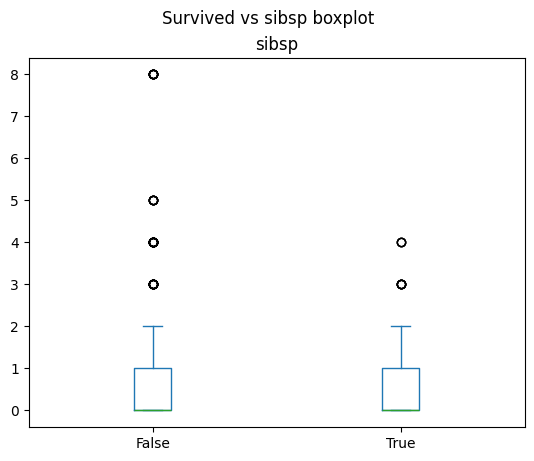

In [15]:
variable = "sibsp"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

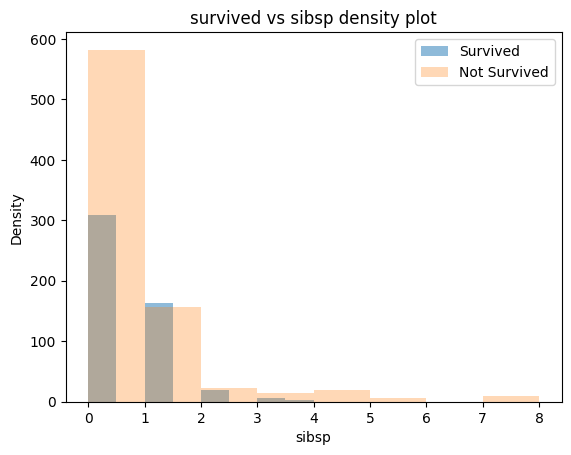

In [16]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="hist",
    label="Survived",
    legend=True,
    bins=8,
    alpha=0.5,
    title=f"survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="hist",
    label="Not Survived",
    legend=True,
    bins=8,
    alpha=0.3,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs parch

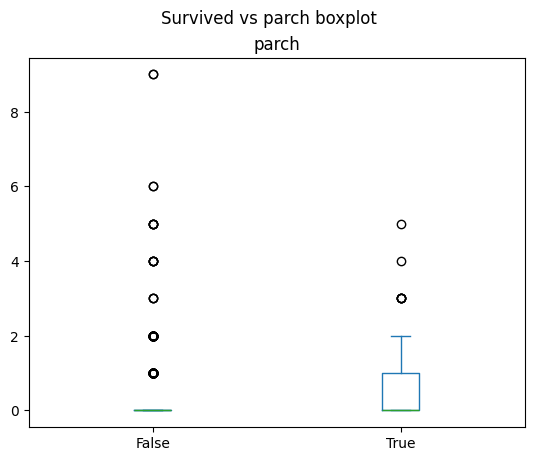

In [17]:
variable = "parch"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

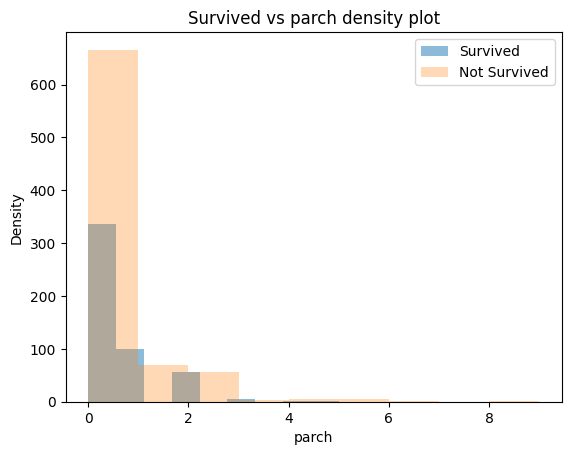

In [18]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="hist",
    label="Survived",
    legend=True,
    bins=9,
    alpha=0.5,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="hist",
    label="Not Survived",
    legend=True,
    bins=9,
    alpha=0.3,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs fare

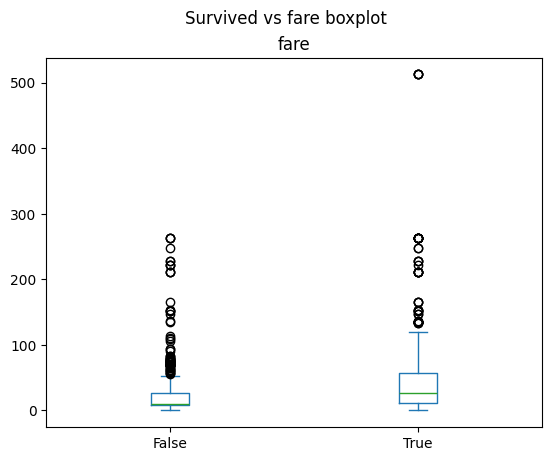

In [19]:
variable = "fare"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

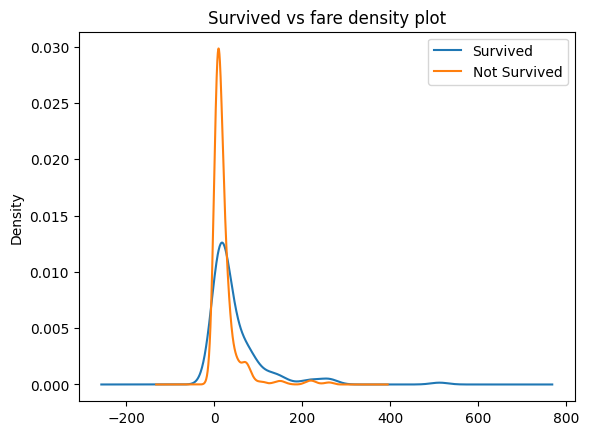

In [20]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="kde",
    label="Survived",
    legend=True,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="kde",
    label="Not Survived",
    legend=True,
    xlabel=variable,
    ylabel="Density",
);

#### Target vs Categorical Variables

##### survived vs pclass

In [21]:
column = "pclass"

(
    pd.crosstab(titanic_df[column], titanic_df["survived"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Survived vs pclass Heatmap")
)

survived,False,True,All
pclass,,,
3,528,181,709
2,158,119,277
1,123,200,323
All,809,500,1309


In [22]:
titanic_df.groupby(column, observed=True).agg({"survived": "mean"}) * 100

,survived
pclass,
3,25.53
2,42.96
1,61.92


2nd class passengers had twice the survival rate of 3rd class and 1st class passengers had even better rates

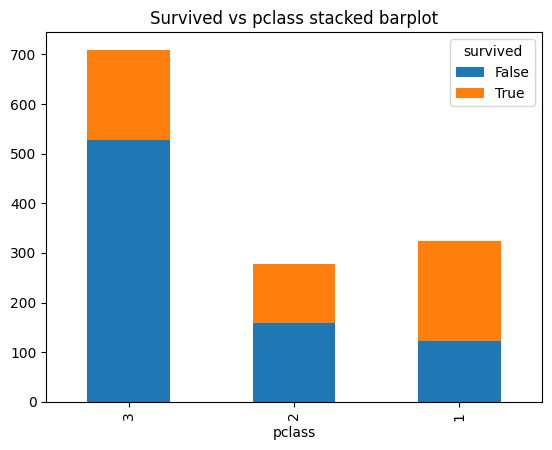

In [23]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar", stacked=True, title=f"Survived vs {column} stacked barplot"
    )
);

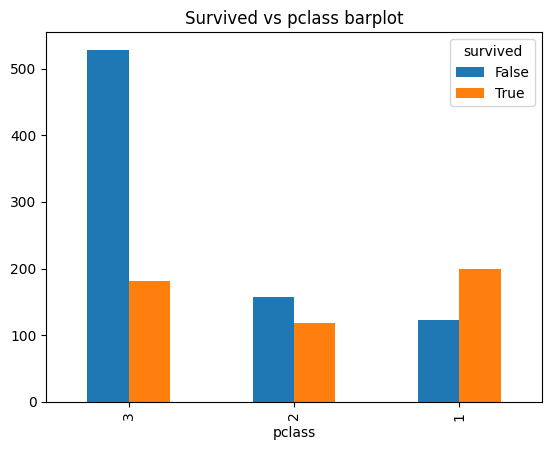

In [24]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar",
        title=f"Survived vs {column} barplot",
    )
);

##### survived vs sex

In [25]:
column = "sex"

(
    pd.crosstab(titanic_df[column], titanic_df["survived"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Survived vs pclass Heatmap")
)

survived,False,True,All
sex,,,
female,127,339,466
male,682,161,843
All,809,500,1309


In [26]:
titanic_df.groupby(column, observed=True).agg({"survived": "mean"}) * 100

,survived
sex,
female,72.75
male,19.10


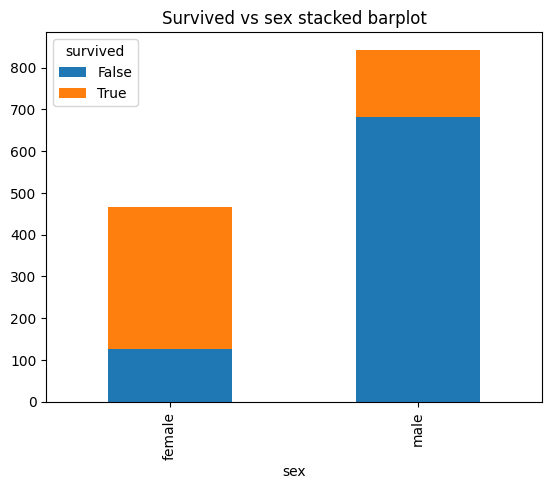

In [27]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar", stacked=True, title=f"Survived vs {column} stacked barplot"
    )
);

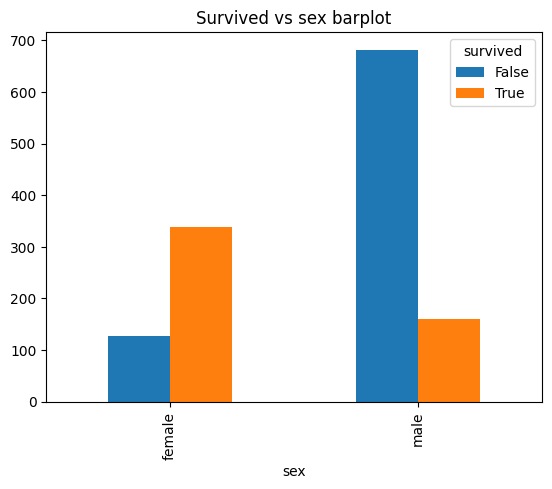

In [28]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar",
        title=f"Survived vs {column} barplot",
    )
);

##### survived vs embarked

In [29]:
column = "embarked"

(
    pd.crosstab(titanic_df[column], titanic_df["survived"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Survived vs pclass Heatmap")
)

survived,False,True,All
embarked,,,
C,120,150,270
Q,79,44,123
S,610,304,914
All,809,498,1307


In [30]:
titanic_df.groupby(column, observed=True).agg({"survived": "mean"}) * 100

,survived
embarked,
C,55.56
Q,35.77
S,33.26


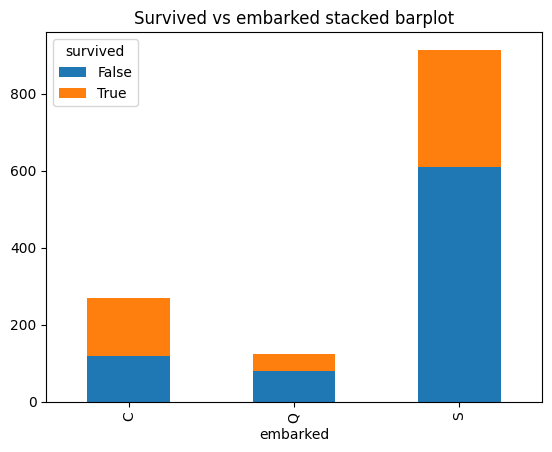

In [31]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar", stacked=True, title=f"Survived vs {column} stacked barplot"
    )
);

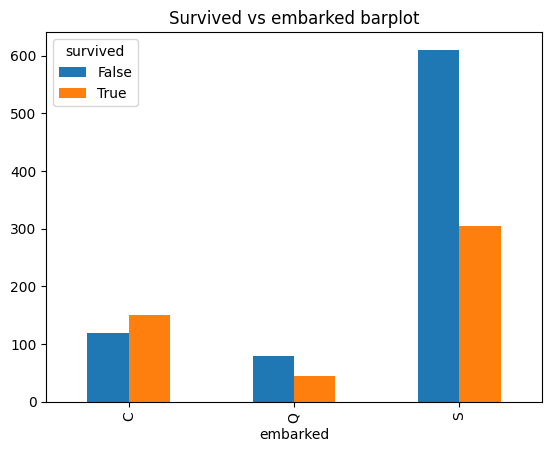

In [32]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar",
        title=f"Survived vs {column} barplot",
    )
);

#### Numerical vs Numerical Variables

##### age vs sibsp

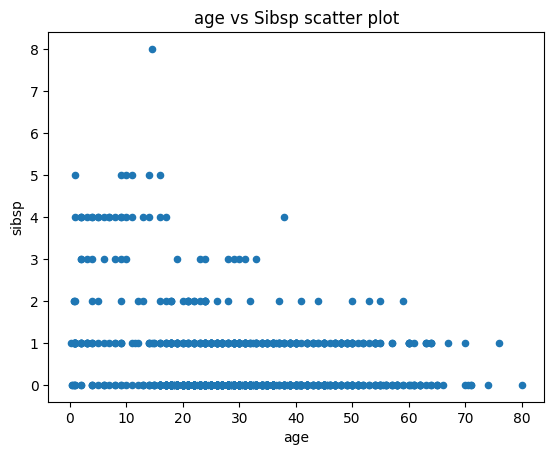

In [33]:
# scatter plot of age vs sibsp

titanic_df.plot(
    kind="scatter",
    x="age",
    y="sibsp",
    title="age vs Sibsp scatter plot",
);

##### age vs parch

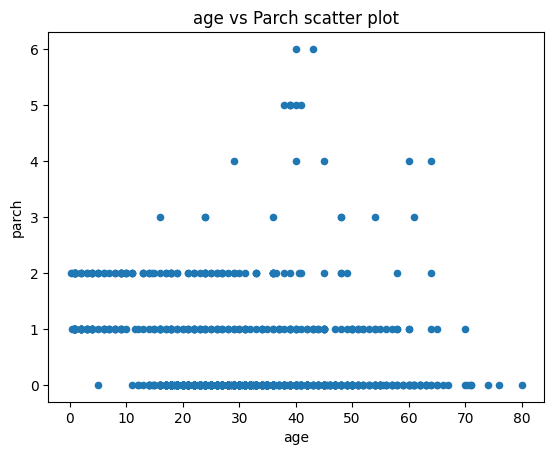

In [34]:
# scatter plot of age vs parch

titanic_df.plot(
    kind="scatter",
    x="age",
    y="parch",
    title="age vs Parch scatter plot",
);

##### age vs fare

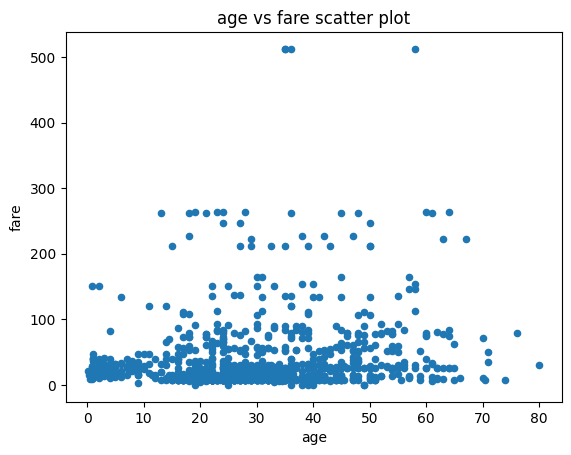

In [35]:
# scatter plot of age vs fare

titanic_df.plot(
    kind="scatter",
    x="age",
    y="fare",
    title="age vs fare scatter plot",
);

##### sibsp vs parch

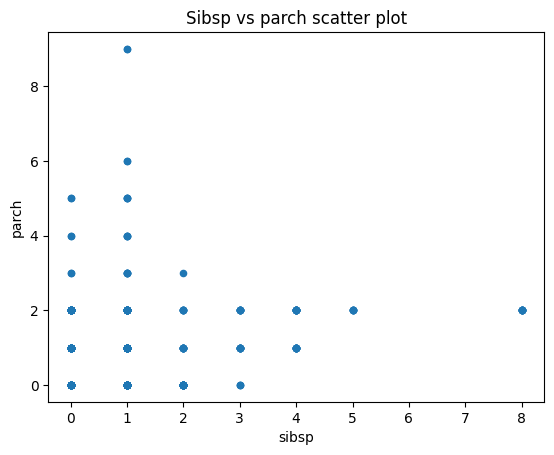

In [36]:
# scatter plot of sibsp vs parch

titanic_df.plot(
    kind="scatter",
    x="sibsp",
    y="parch",
    title="Sibsp vs parch scatter plot",
);

##### sibsp vs fare

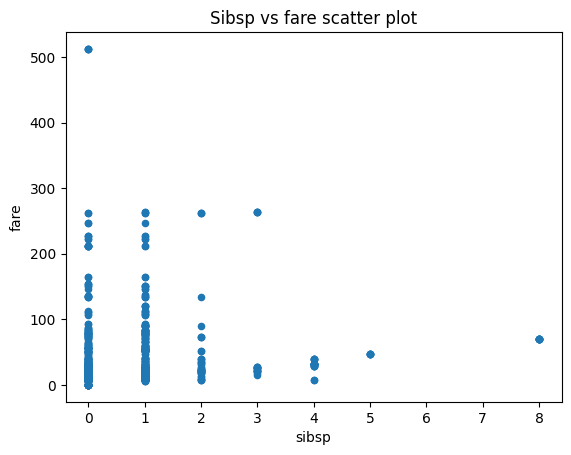

In [37]:
# scatter plot of sibsp vs fare

titanic_df.plot(
    kind="scatter",
    x="sibsp",
    y="fare",
    title="Sibsp vs fare scatter plot",
);

##### parch vs fare

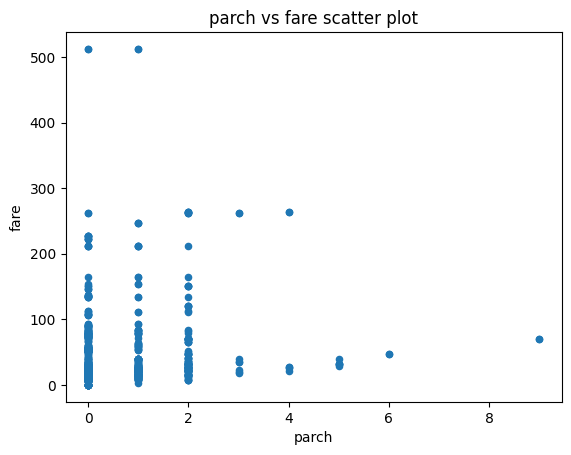

In [38]:
# scatter plot of parch vs fare

titanic_df.plot(
    kind="scatter",
    x="parch",
    y="fare",
    title="parch vs fare scatter plot",
);

#### Categorical vs Categorical Variables

##### pclass vs sex

In [39]:
column_1 = "pclass"
column_2 = "sex"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

sex,female,male,All
pclass,,,
3,216,493,709
2,106,171,277
1,144,179,323
All,466,843,1309


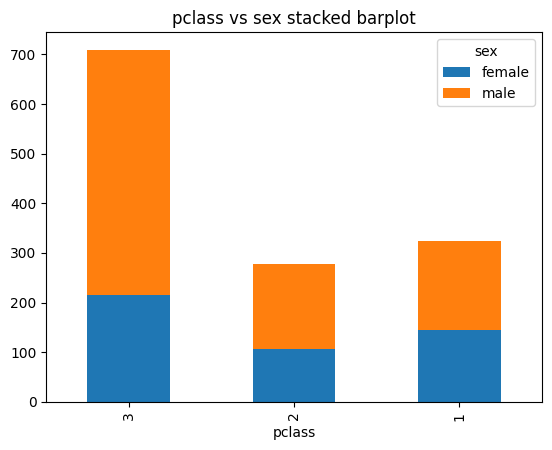

In [40]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

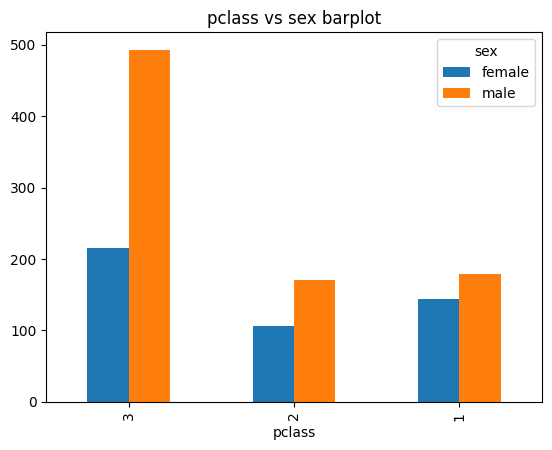

In [41]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### pclass vs embarked

In [42]:
column_1 = "pclass"
column_2 = "embarked"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

embarked,C,Q,S,All
pclass,,,,
3,101,113,495,709
2,28,7,242,277
1,141,3,177,321
All,270,123,914,1307


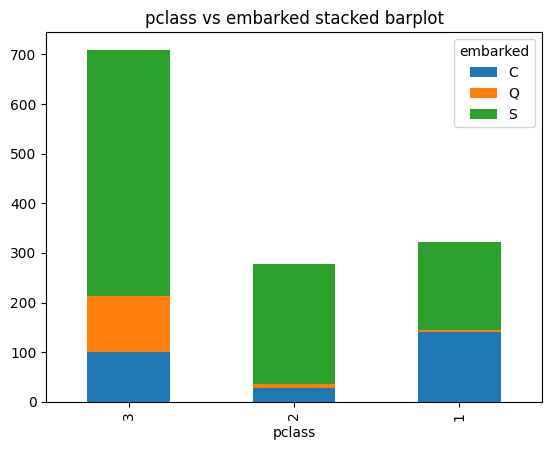

In [43]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

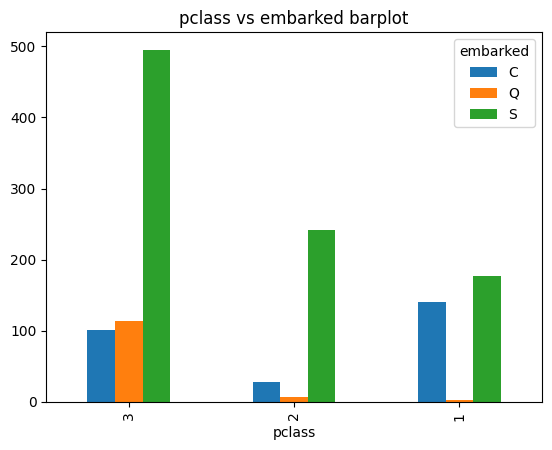

In [44]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### sex vs embarked

In [45]:
column_1 = "sex"
column_2 = "embarked"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

embarked,C,Q,S,All
sex,,,,
female,113,60,291,464
male,157,63,623,843
All,270,123,914,1307


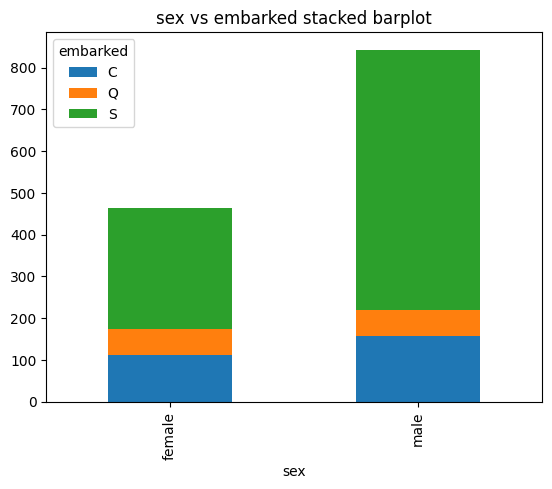

In [46]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

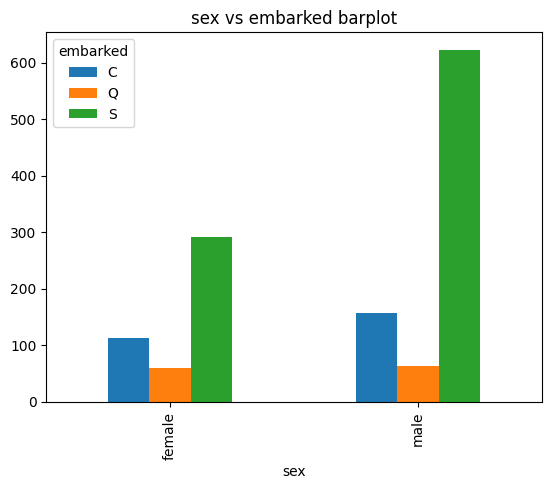

In [47]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### sex vs pclass

In [48]:
column_1 = "sex"
column_2 = "pclass"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

pclass,3,2,1,All
sex,,,,
female,216,106,144,466
male,493,171,179,843
All,709,277,323,1309


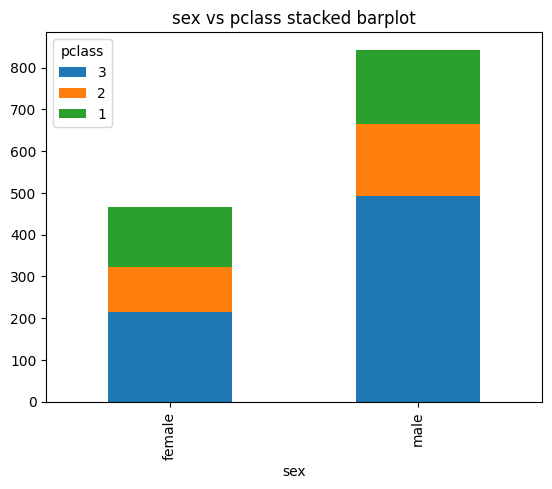

In [49]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

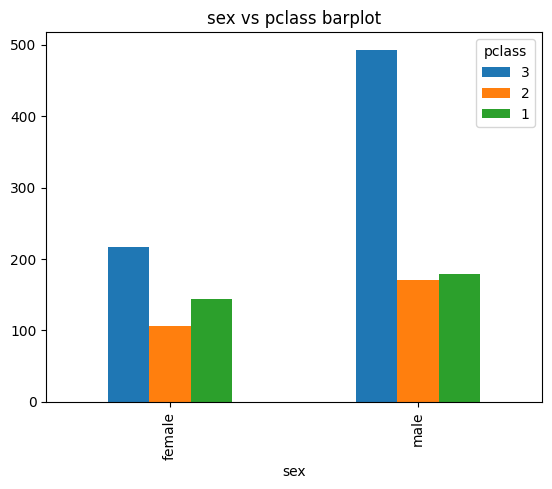

In [50]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### embarked vs pclass

In [51]:
column_1 = "embarked"
column_2 = "pclass"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

pclass,3,2,1,All
embarked,,,,
C,101,28,141,270
Q,113,7,3,123
S,495,242,177,914
All,709,277,321,1307


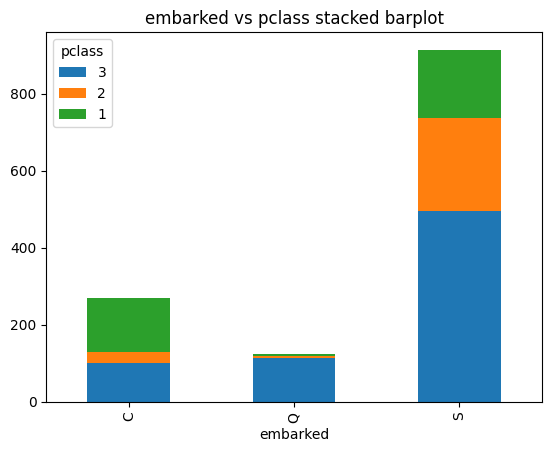

In [52]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

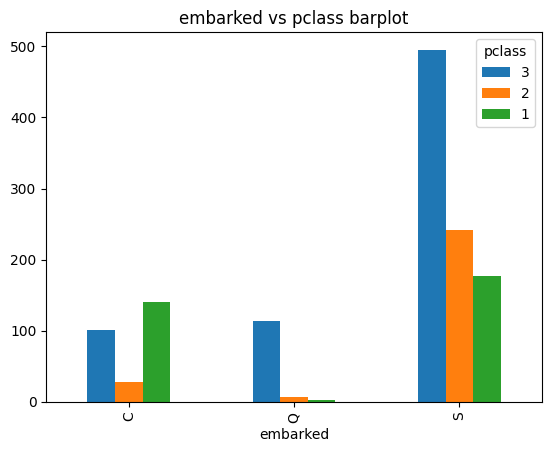

In [53]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### embarked vs sex

In [54]:
column_1 = "embarked"
column_2 = "sex"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

sex,female,male,All
embarked,,,
C,113,157,270
Q,60,63,123
S,291,623,914
All,464,843,1307


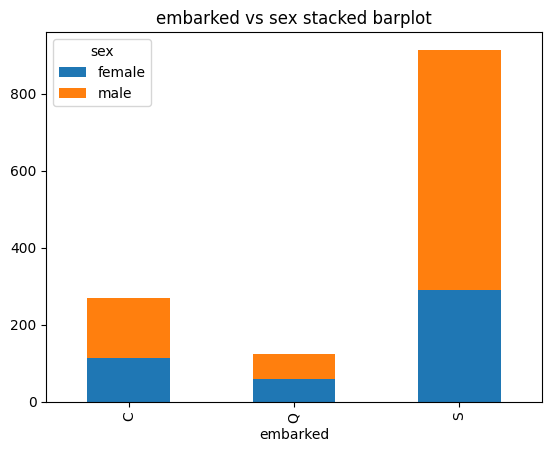

In [55]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

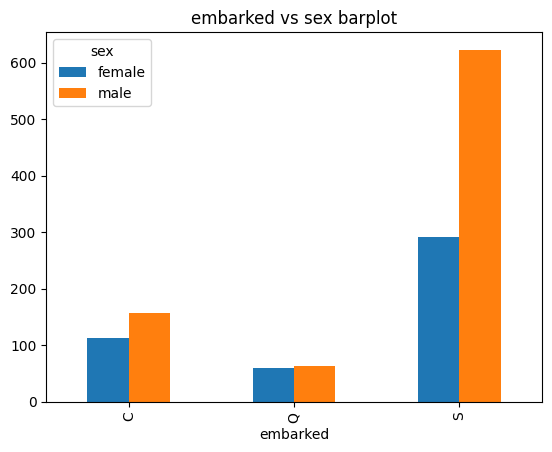

In [56]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

#### Categorical vs Numerical Variables

##### pclass vs age

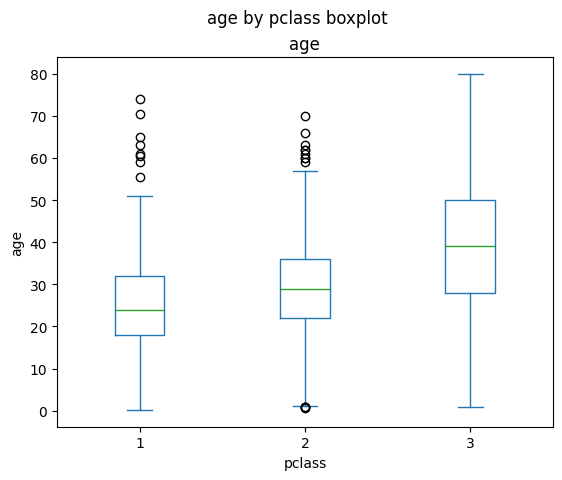

In [57]:
column_cat = "pclass"
column_num = "age"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

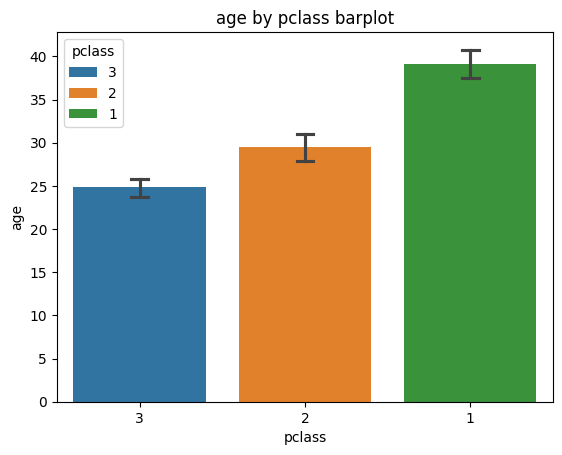

In [58]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### pclass vs sibsp

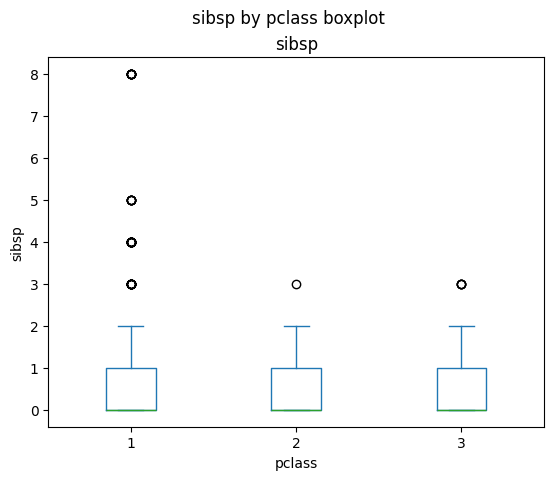

In [59]:
column_num = "sibsp"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

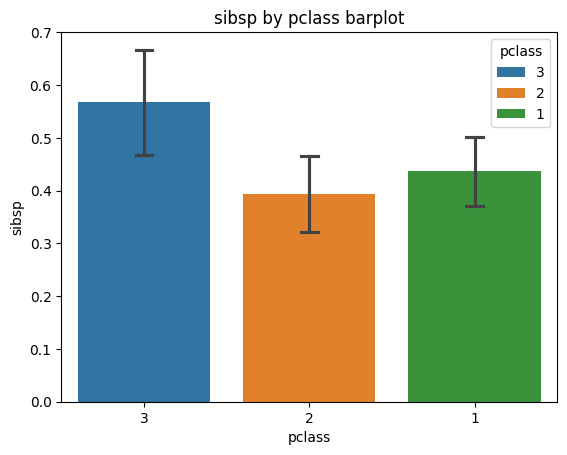

In [60]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### pclass vs parch

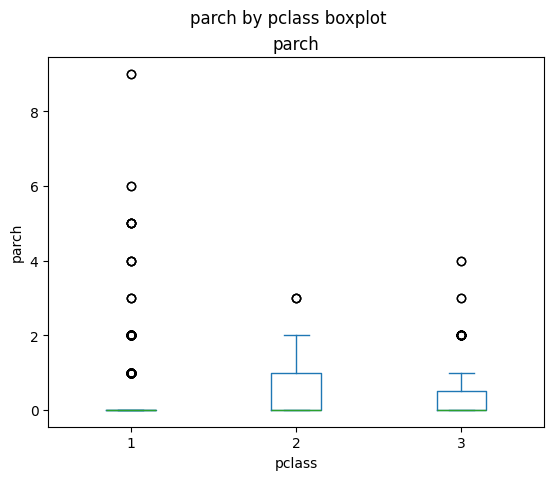

In [61]:
column_num = "parch"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

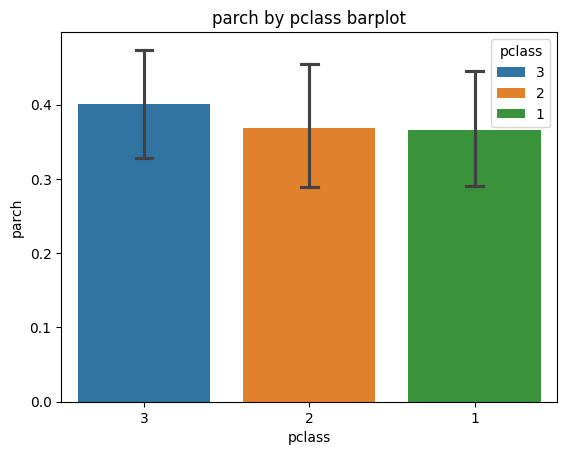

In [62]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### pclass vs fare

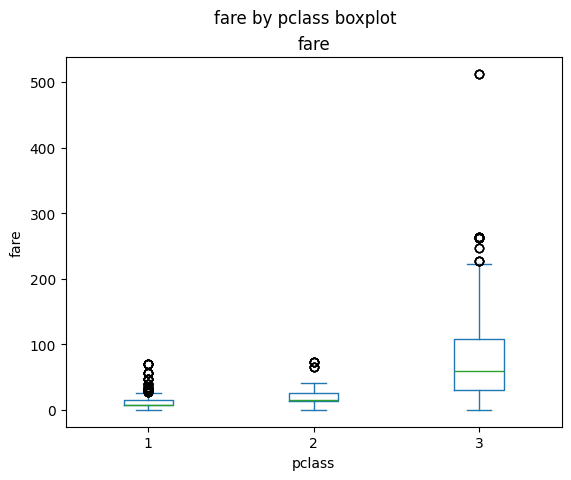

In [63]:
column_num = "fare"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

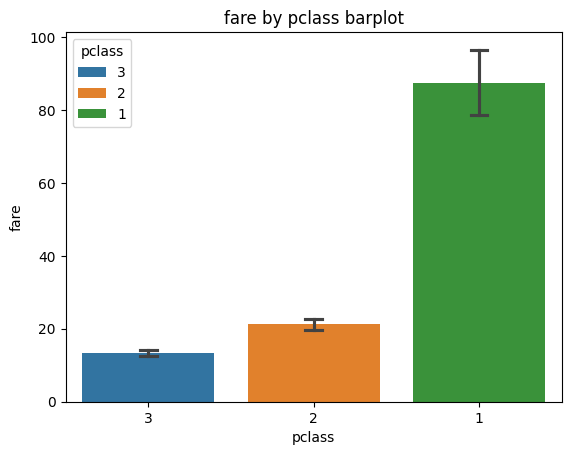

In [64]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### sex vs age

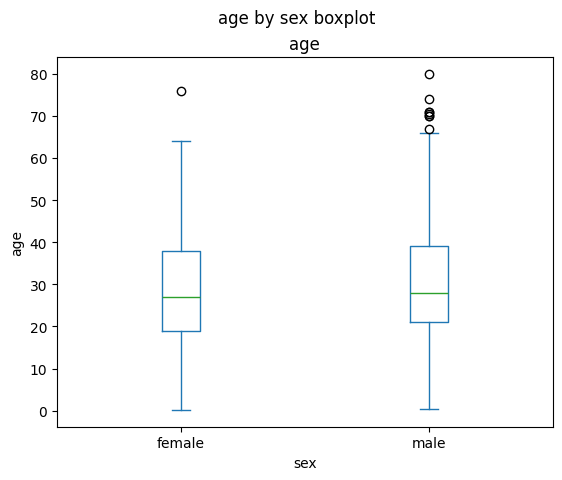

In [65]:
column_cat = "sex"
column_num = "age"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

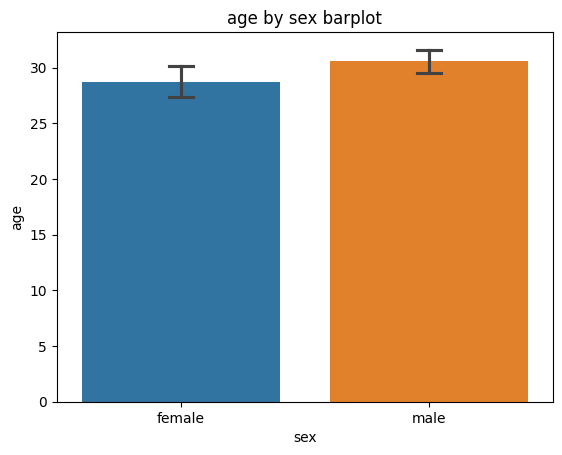

In [66]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### sex vs sibsp

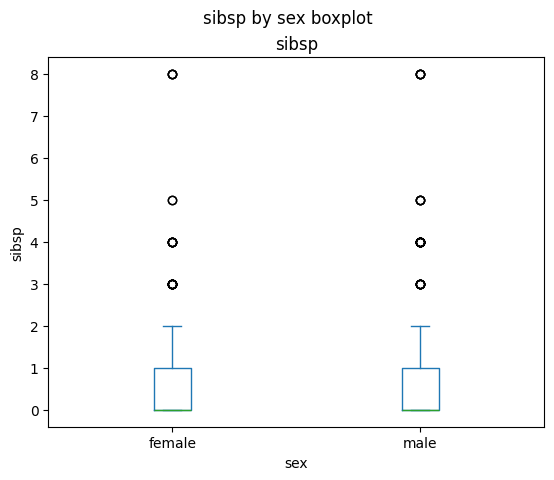

In [67]:
column_num = "sibsp"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

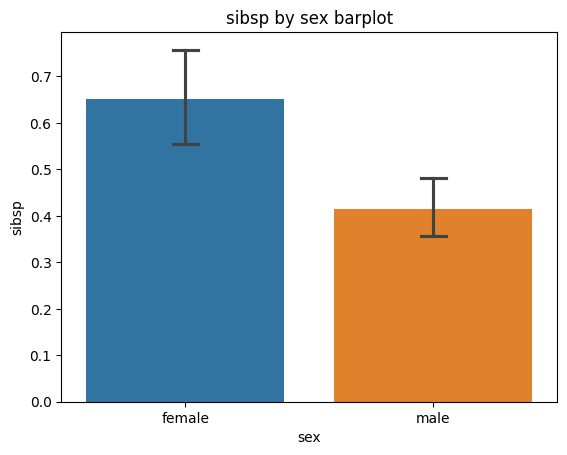

In [68]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### sex vs parch

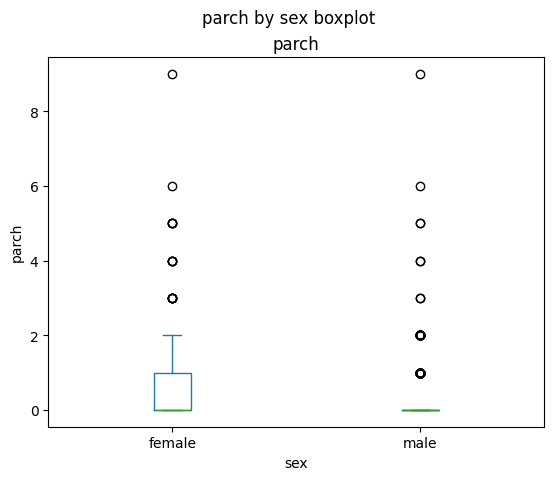

In [69]:
column_num = "parch"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

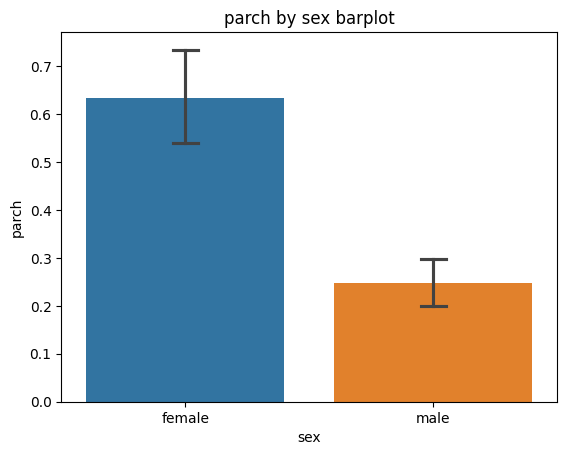

In [70]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### sex vs fare

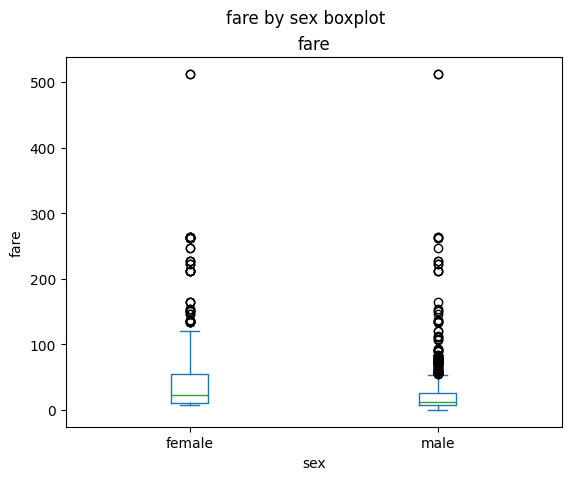

In [71]:
column_num = "fare"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

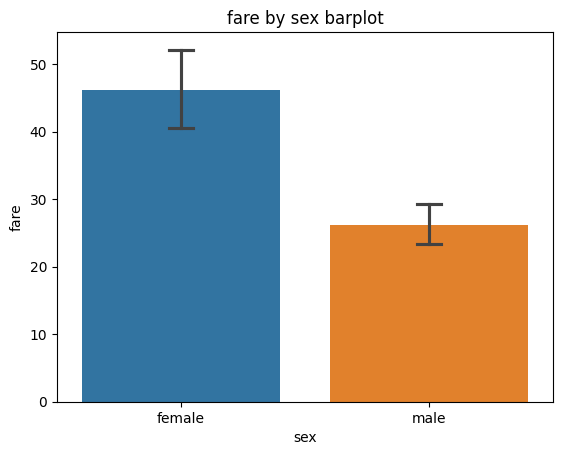

In [72]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### embarked vs age

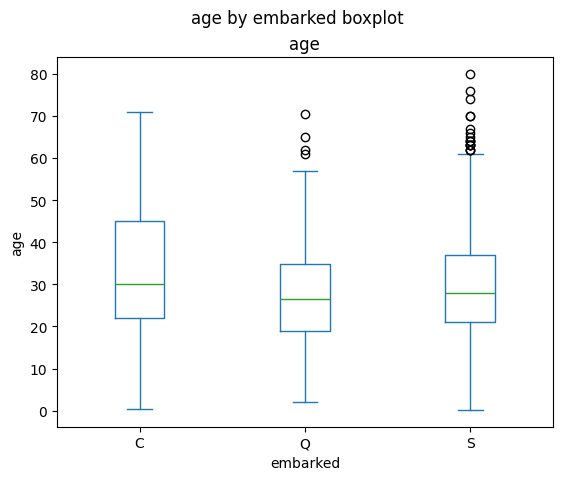

In [73]:
column_cat = "embarked"
column_num = "age"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

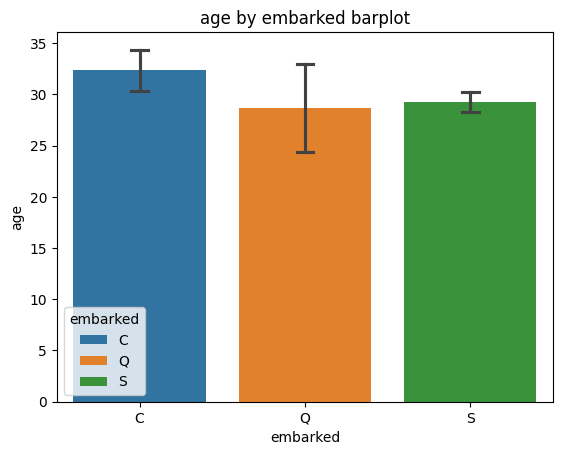

In [74]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### embarked vs sibsp

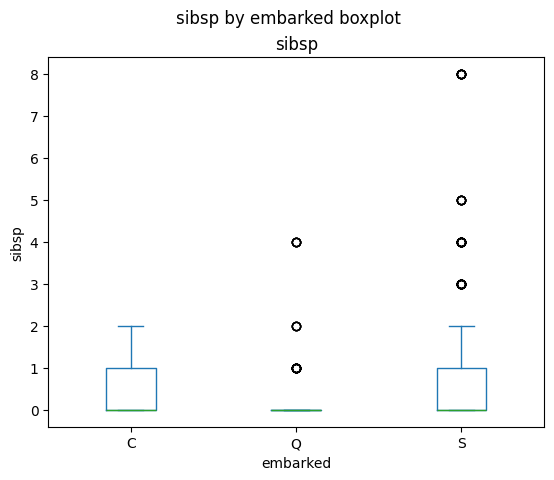

In [75]:
column_num = "sibsp"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

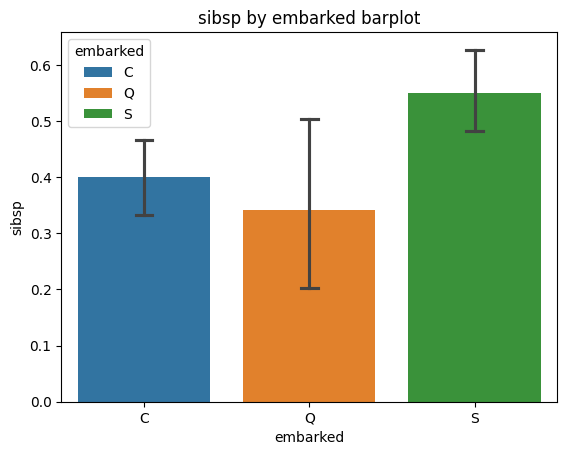

In [76]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### embarked vs parch

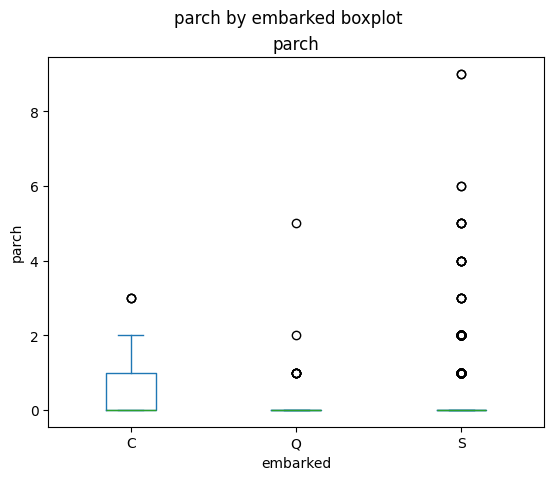

In [77]:
column_num = "parch"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

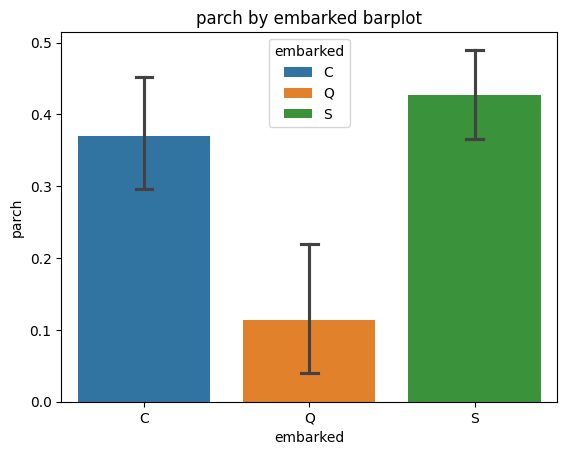

In [78]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

##### embarked vs fare

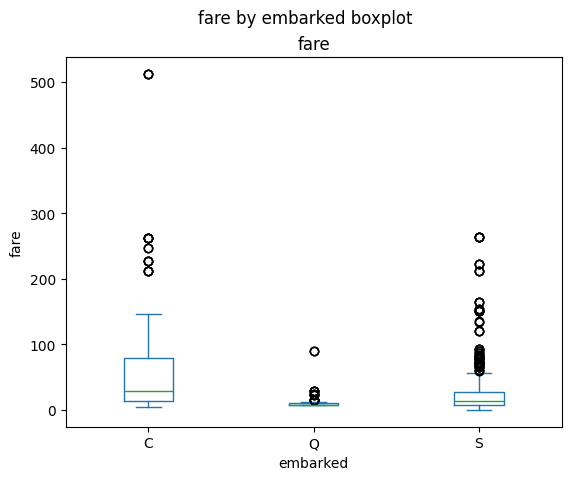

In [79]:
column_num = "fare"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

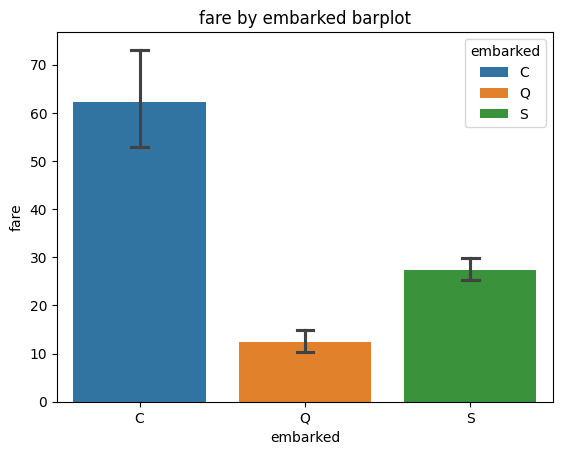

In [80]:
sns.barplot(
    data=titanic_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

## 📊 Analysis of Results and Conclusions 

- Almost all Pclass 1 females survive and so do most of Pclass 2. Pclass 3 female survival is 50% and almost all (86%) Pclass 3 males unfortunately do not survive
- 2nd class passengers had twice the survival rate of 3rd class and 1st class passengers had even better rates
- The fare is highly correlated with the class
- The age is not correlated with the pclass
- The age is not correlated with the fare
- The Survival rate among passengers who embarked in Cherbourg is higher than the others
- The Survival rate among females is higher
- The Survival rate among 1st class passengers is higher
- The Survival rate among age 0-10 is higher
- The two variables that have the highest correlation with the target variable are `sex` and `pclass`

## 💡 Proposals and Ideas




For first baseline model, could use the following features:
- `sex`
- `pclass`
- `age`

and can be done with heuristics or with a simple model like a decision tree.

## 📖 References

Visualización

- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/#visualizacion-con-pandas>
- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/plotly/>
- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/seaborn/>

EDA
- <https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/>
- <https://www.kaggle.com/code/allohvk/titanic-advanced-eda>
- <https://www.kaggle.com/code/imkushwaha/bivariate-multivariate-analysis>

Statistical tests

- <https://nathanrosidi.medium.com/commonly-used-statistical-tests-in-data-science-93787568eb36>